In [59]:
## import public packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import multivariate_normal
import torch
from torch.autograd import Variable

## import self-written packages 
from util import *
from prim_fdr import *
from data_loader import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
## loading GTEx data
p,x,n_full = load_GTEx_full(verbose=True)

## testing the BH method
n_rej,t_rej=bh(p,alpha=0.1,n_sample=n_full,verbose=True)

## testing the Storey BH method
n_rej,t_rej,pi0_hat=storey_bh(p,alpha=0.1,n_sample=n_full,lamb=0.995,verbose=True)

## Load GTEx full data ##
# all hypothesis: 10623893
# filtered hypothesis: 169301
# p=0.00226011, x=[ 13.73583078   0.08957559   0.112     ]
# p=0.00254028, x=[ 13.74614226   0.08957559   0.        ]
# p=0.000610689, x=[ 13.74784609   0.08957559   0.        ]
# p=0.00071358, x=[  1.37478546e+01   8.95755866e-02   1.20000000e-02]
# p=0.000228687, x=[ 13.74820448   0.08957559   0.209     ]


### bh summary ###
# rejections: 29348
rejection threshold: 0.000276205


### sbh summary ###
# rejections: 29689
rejection threshold: 0.000286432
null estimate: 0.975405155154




### Testing ###

Pre prep


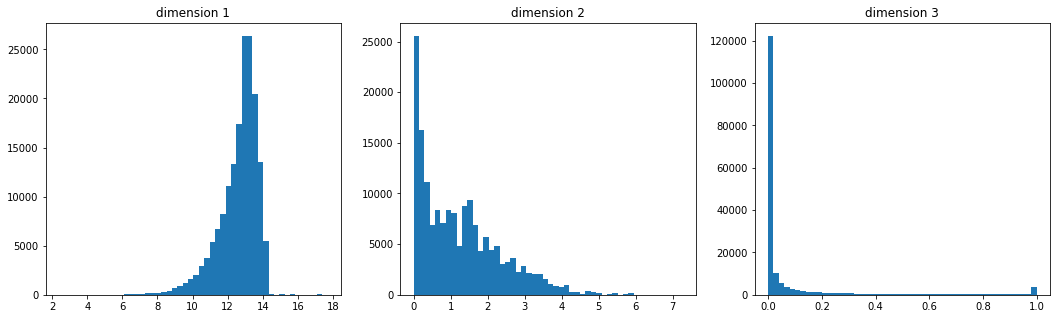

Post prep


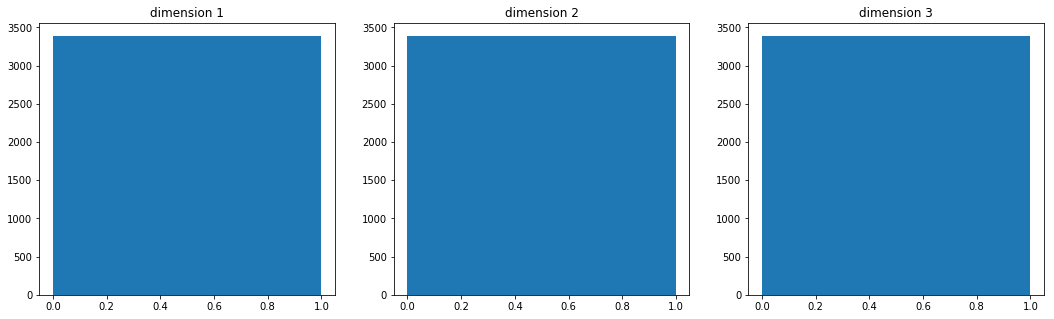

In [113]:
temp = x_prep(x,verbose=True)

### Results on PrimFDR_v2: 

$t(x) \propto \frac{\pi_1(x)+1e-5}{\pi_0(x)+1e-5} $, where $\pi_1(x)$, $\pi_0(x)$ are estimated via the mixture model. 

### Baseline: 
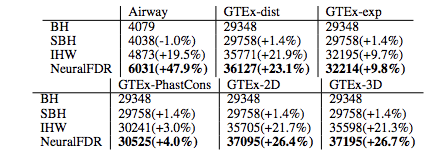

## PrimFDR_init starts
# Learning null distribution
!!! the model does not converge !!!


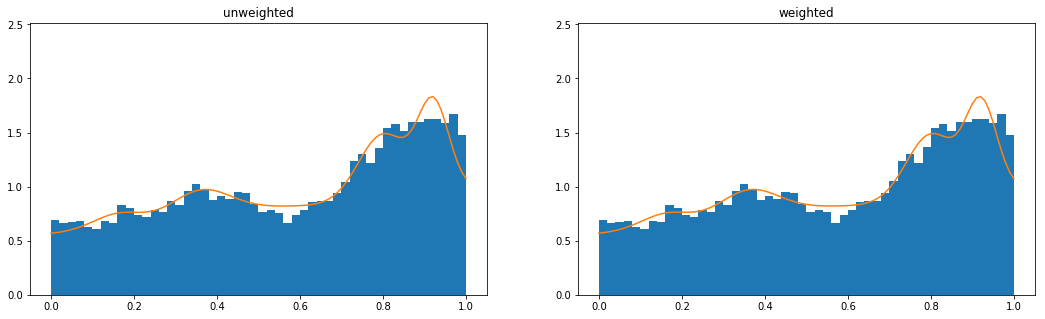

# Learning alternative distribution


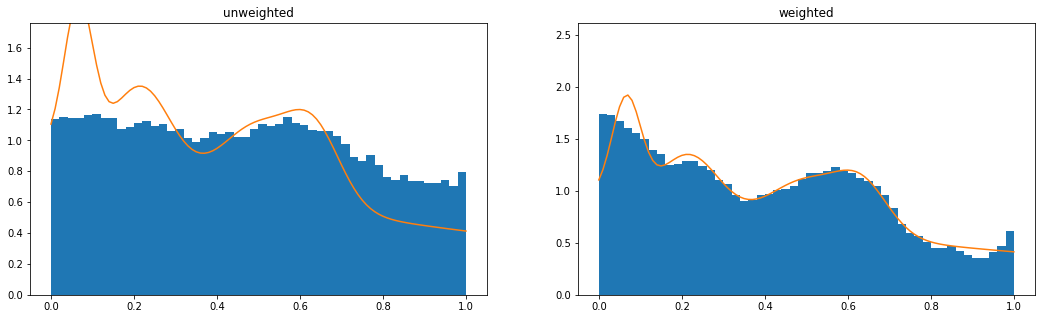

# Test result with PrimFDR_init
# Num of discovery: 34458




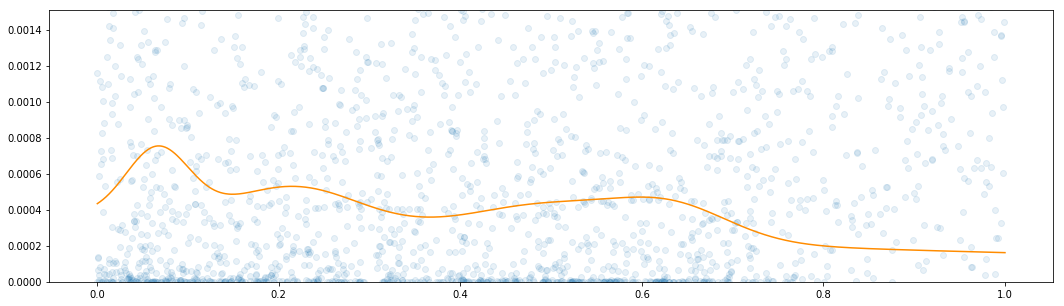

## PrimFDR_init finishes

## optimization paramter:
# n_itr=10000, n_samp=169301, lambda0=12746, lambda1=100

## optimization initialization:
# Slope: a=[-0.8201611], b=[-7.90595675]
# Bump 0: w=-8.63047, mu=[ 0.63562387], sigma=[ 0.00811433]
# Bump 1: w=-8.41507, mu=[ 0.21958022], sigma=[ 0.01033295]
# Bump 2: w=-7.89346, mu=[ 0.06650707], sigma=[ 0.00246385]
# Bump 3: w=-12.7221, mu=[ 0.73972815], sigma=[ 0.00705748]
# Bump 4: w=-8.62155, mu=[ 0.49828136], sigma=[ 0.01574849]


## iteration 0
n_rej:  34459
n_rej sig:  33978.1
FD esti mirror: 3445
FD esti mirror sig: 3498.84
loss1:  [-0.20069608]
loss2:  [ 0.05967505]
Estimated FDP: [ 0.12264492]
FDP: 0.0
Slope: a=[-0.8251611], b=[-7.91095686]
Bump 0: w=-8.63547, mu=[ 0.63062388], sigma=[ 0.00811433]
Bump 1: w=-8.42007, mu=[ 0.21458024], sigma=[ 0.01033295]
Bump 2: w=-7.89846, mu=[ 0.06150708], sigma=[ 0.00246385]
Bump 3: w=-12.7271, mu=[ 0.73472834], sigma=[ 0.00705748]
Bump 4: w=-8.62655, mu=[ 0.49328139], sigma=[ 0.01574849]


/home/martin/NeuralFDR2/util.py:164: RuntimeWarning: overflow encountered in exp
  duration = self.summarize_step( start=self.step_start, step_name=name, level=self.level )


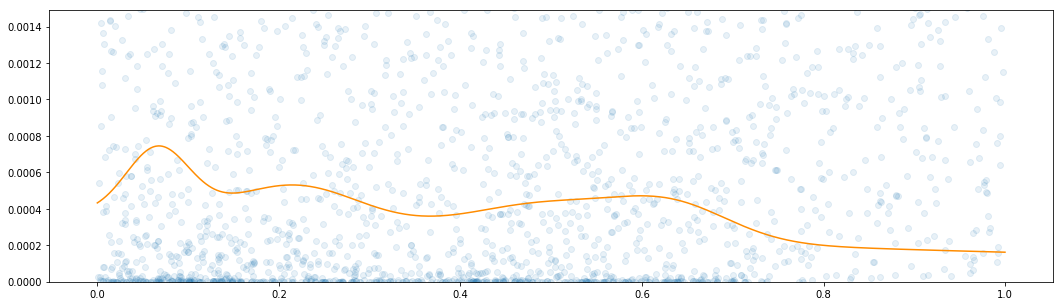

In [ ]:
## test prim_fdr
n_rej,t=PrimFDR(p,x[:,0],5,alpha=0.1,h=None,nr=10623893/p.shape[0],n_itr=10000,verbose=True)

In [ ]:
## test prim_fdr
n_rej,t=PrimFDR(p,x[:,1],5,alpha=0.1,h=None,nr=10623893/p.shape[0],n_itr=10000,verbose=True)

In [ ]:
## test prim_fdr
n_rej,t=PrimFDR(p,x[:,2],5,alpha=0.1,h=None,nr=10623893/p.shape[0],n_itr=10000,verbose=True)

In [ ]:
## test prim_fdr
n_rej,t=PrimFDR(p,x[:,0:2],5,alpha=0.1,h=None,nr=10623893/p.shape[0],n_itr=10000,verbose=True)

In [ ]:
## test prim_fdr
n_rej,t=PrimFDR(p,x,5,alpha=0.1,h=None,nr=10623893/p.shape[0],n_itr=10000,verbose=True)

## ML initialization starts ##
!!! the model does not converge !!!


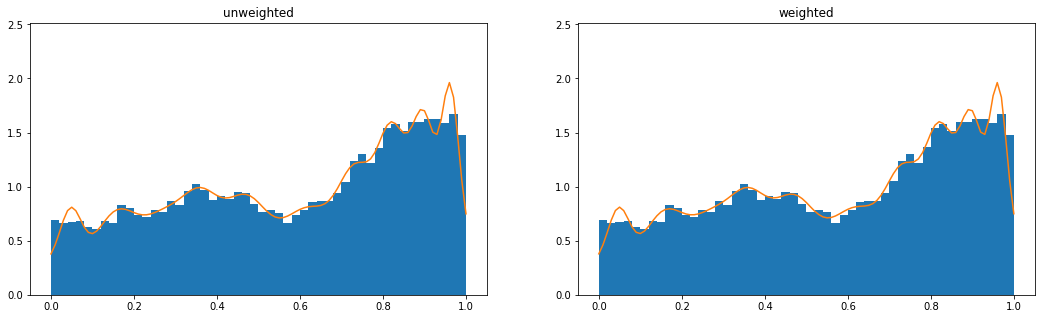

!!! the model does not converge !!!


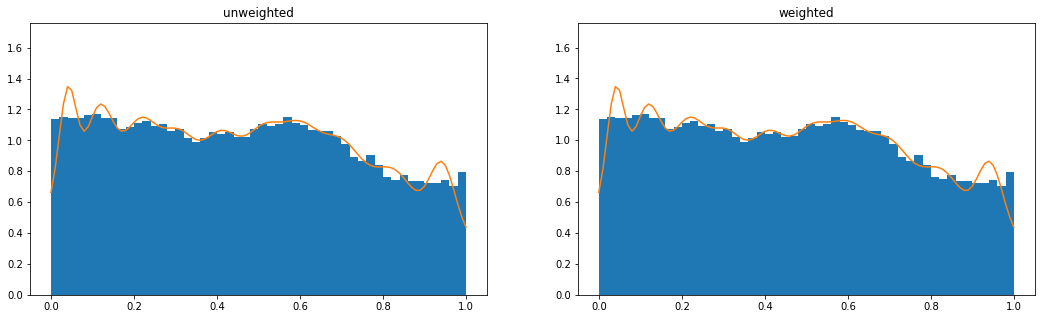

## Learned parameters for null population ##
Slope: w=0.380896236639, a=0.5470556640625
Bump 0: w=0.0830738829676, mu=[ 0.89832268], sigma=[ 0.02887056]
Bump 1: w=0.0577168910136, mu=[ 0.3617987], sigma=[ 0.04419425]
Bump 2: w=0.054807367747, mu=[ 0.61776428], sigma=[ 0.05557788]
Bump 3: w=0.052355821559, mu=[ 0.1593175], sigma=[ 0.04702148]
Bump 4: w=0.0725650265554, mu=[ 0.73423262], sigma=[ 0.04084888]
Bump 5: w=0.0639939583179, mu=[ 0.46986386], sigma=[ 0.04903869]
Bump 6: w=0.0673599508288, mu=[ 0.9627392], sigma=[ 0.02023487]
Bump 7: w=0.0893257782255, mu=[ 0.82192427], sigma=[ 0.03406845]
Bump 8: w=0.0473340480522, mu=[ 0.27193868], sigma=[ 0.05017609]
Bump 9: w=0.0305710380943, mu=[ 0.04748357], sigma=[ 0.02583833]


## Learned parameters for alternative population ##
Slope: w=0.429603159483, a=-0.42949707031250006
Bump 0: w=0.0358873670121, mu=[ 0.94296103], sigma=[ 0.03146316]
Bump 1: w=0.0630341163721, mu=[ 0.50880249], sigma=[ 0.04594355]
Bump 2: w=0.0639108951453, mu=[ 0.2

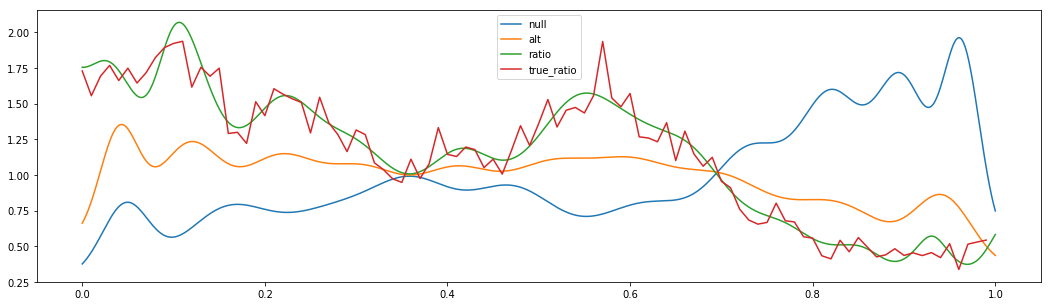

## Testing Summary ##
Num of discovery: 34438




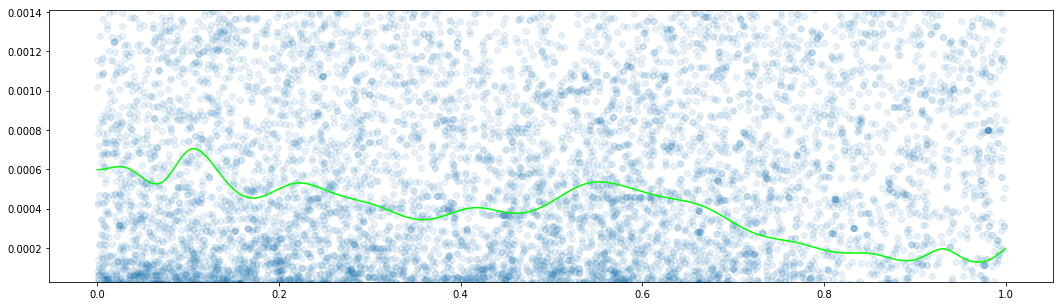

In [115]:
# first feature 
PrimFDR_v2(p,x[:,0],10,alpha=0.1,n_itr=100,h=None,verbose=True)

## ML initialization starts ##


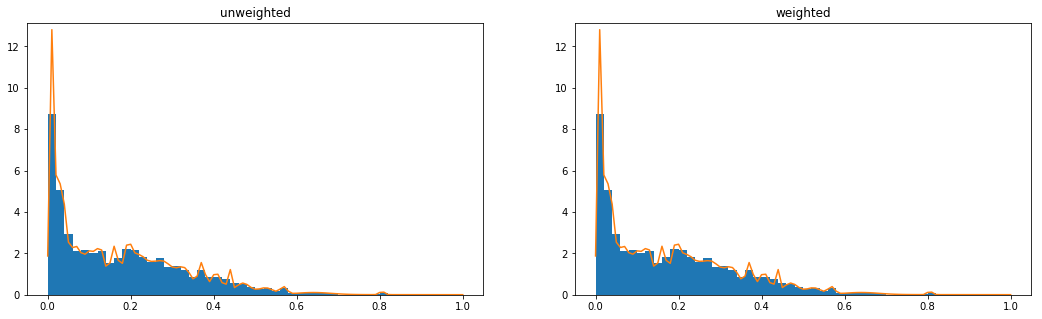

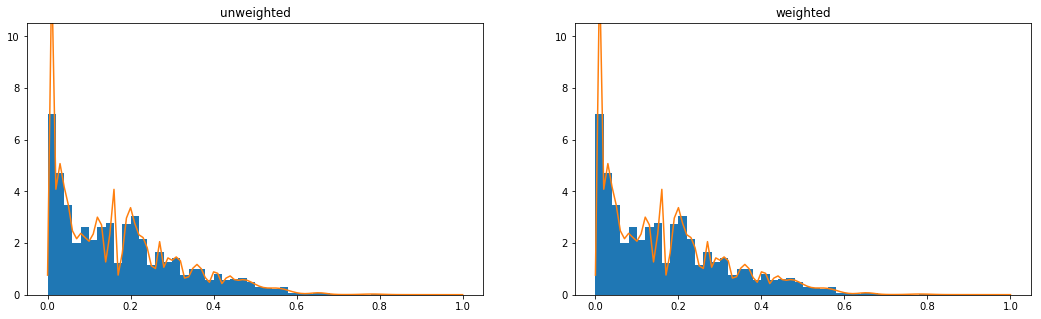

## Learned parameters for null population ##
Slope: w=0.0173699042944, a=-2.1874853515624997
Bump 0: w=0.014644118387, mu=[ 0.52511799], sigma=[ 0.01827805]
Bump 1: w=0.140594035812, mu=[ 0.03142189], sigma=[ 0.01082623]
Bump 2: w=0.0467023093254, mu=[ 0.24738046], sigma=[ 0.016887]
Bump 3: w=0.0269917529584, mu=[ 0.37131692], sigma=[ 0.00791548]
Bump 4: w=0.0527452590894, mu=[ 0.16035477], sigma=[ 0.00935396]
Bump 5: w=0.0105804058564, mu=[ 0.64056506], sigma=[ 0.04243302]
Bump 6: w=0.0638482569357, mu=[ 0.10247713], sigma=[ 0.01380966]
Bump 7: w=0.0135413496513, mu=[ 0.43799266], sigma=[ 0.00474046]
Bump 8: w=0.0615171234213, mu=[ 0.28015497], sigma=[ 0.01858399]
Bump 9: w=0.160557694263, mu=[ 0.01065569], sigma=[ 0.00542047]
Bump 10: w=0.0023613116371, mu=[ 0.80538075], sigma=[ 0.00552959]
Bump 11: w=0.0544567019732, mu=[ 0.21881792], sigma=[ 0.01436473]
Bump 12: w=0.0678693828089, mu=[ 0.32713323], sigma=[ 0.02134969]
Bump 13: w=0.0875404022612, mu=[ 0.06614599], sigma=[ 0.01560615

/home/martin/NeuralFDR2/prim_fdr.py:66: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(bins[0:-1],p_alt/p_null,label='true_ratio')


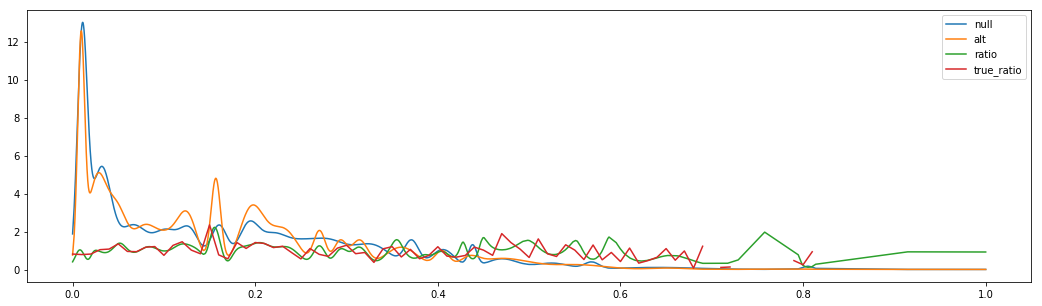

## Testing Summary ##
Num of discovery: 31734




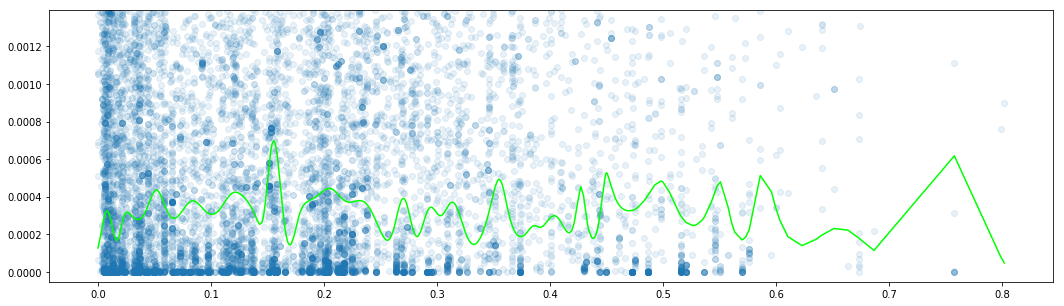

In [93]:
## second feature 
PrimFDR_v2(p,x[:,1],20,alpha=0.1,n_itr=100,h=None,verbose=True)

## ML initialization starts ##


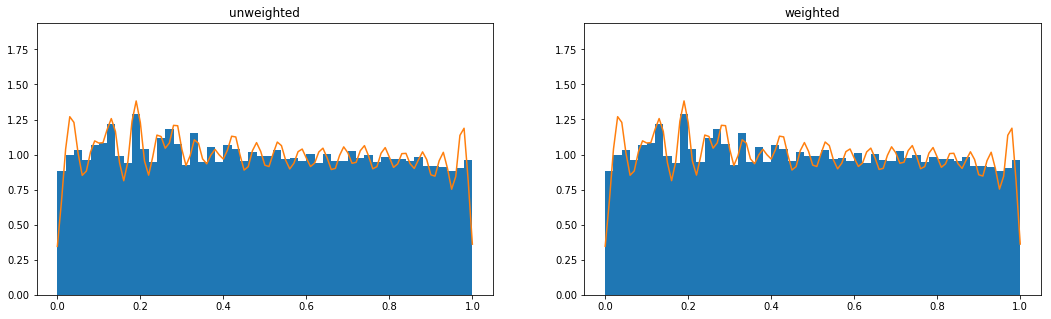

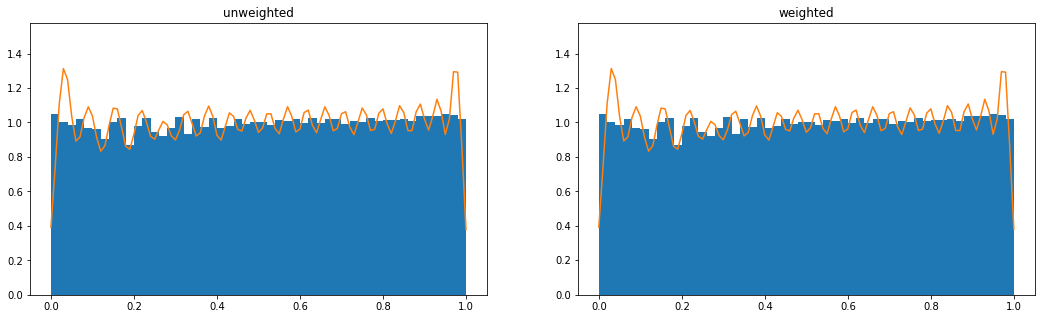

## Learned parameters for null population ##
Slope: w=0.0503434945818, a=-0.3318310546875
Bump 0: w=0.0422962291223, mu=[ 0.93055593], sigma=[ 0.01816711]
Bump 1: w=0.0459830007634, mu=[ 0.37798239], sigma=[ 0.02028839]
Bump 2: w=0.0521613024521, mu=[ 0.13359527], sigma=[ 0.01881023]
Bump 3: w=0.0495499160224, mu=[ 0.58653828], sigma=[ 0.02155414]
Bump 4: w=0.0456840769166, mu=[ 0.73916251], sigma=[ 0.01959476]
Bump 5: w=0.0505663125122, mu=[ 0.47884898], sigma=[ 0.02076551]
Bump 6: w=0.0420742700529, mu=[ 0.3319996], sigma=[ 0.01753991]
Bump 7: w=0.0483927445415, mu=[ 0.0878384], sigma=[ 0.02016736]
Bump 8: w=0.0432976861622, mu=[ 0.83532795], sigma=[ 0.01949897]
Bump 9: w=0.0466821208303, mu=[ 0.69057338], sigma=[ 0.02020319]
Bump 10: w=0.0593295632884, mu=[ 0.18972386], sigma=[ 0.01819821]
Bump 11: w=0.0513454156309, mu=[ 0.5325832], sigma=[ 0.0211038]
Bump 12: w=0.0460674039256, mu=[ 0.24230663], sigma=[ 0.01783742]
Bump 13: w=0.0482008371108, mu=[ 0.63877648], sigma=[ 0.02097612]


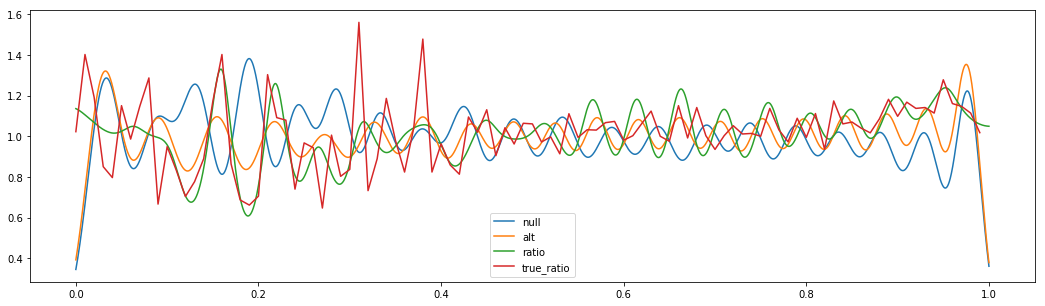

## Testing Summary ##
Num of discovery: 31536




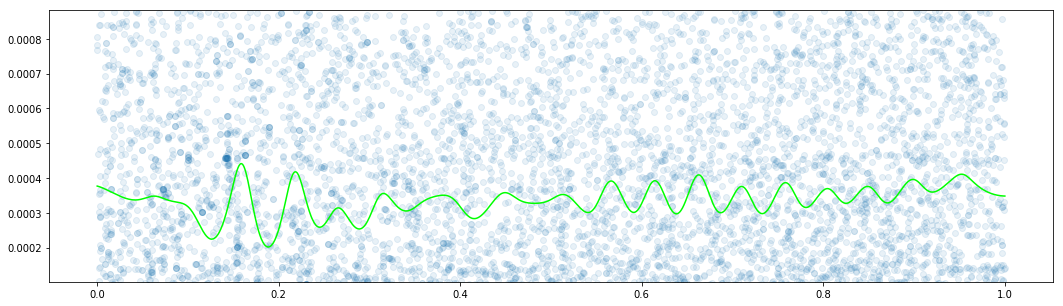

In [40]:
## third feature 
PrimFDR_v2(p,x[:,2],20,alpha=0.1,n_itr=100,h=None,verbose=True)

## ML initialization starts ##
## Learned parameters for null population ##
Slope: w=0.86561854294, a=[ 0.64470215 -0.13649902]
Bump 0: w=0.0436854320896, mu=[ 0.83665117  0.83000274], sigma=[ 0.07292636  0.08169188]
Bump 1: w=0.0215280039153, mu=[ 0.82874319  0.16733793], sigma=[ 0.07306852  0.06619321]
Bump 2: w=0.0199427038942, mu=[ 0.33508051  0.82856658], sigma=[ 0.11822868  0.07584975]
Bump 3: w=0.0326737442173, mu=[ 0.88316217  0.4750456 ], sigma=[ 0.05045088  0.16166703]
Bump 4: w=0.0165515729438, mu=[ 0.33804575  0.14784711], sigma=[ 0.12915256  0.05062837]


## Learned parameters for alternative population ##
Slope: w=0.884829826211, a=[-0.33183105 -0.03883301]
Bump 0: w=0.012942772777, mu=[ 0.62041853  0.88477729], sigma=[ 0.06763713  0.04753763]
Bump 1: w=0.0137451551431, mu=[ 0.21390539  0.27207682], sigma=[ 0.05042806  0.04988307]
Bump 2: w=0.0298529802996, mu=[ 0.26358642  0.65364886], sigma=[ 0.10850636  0.11624794]
Bump 3: w=0.0312510694596, mu=[ 0.60034333  0.33876074

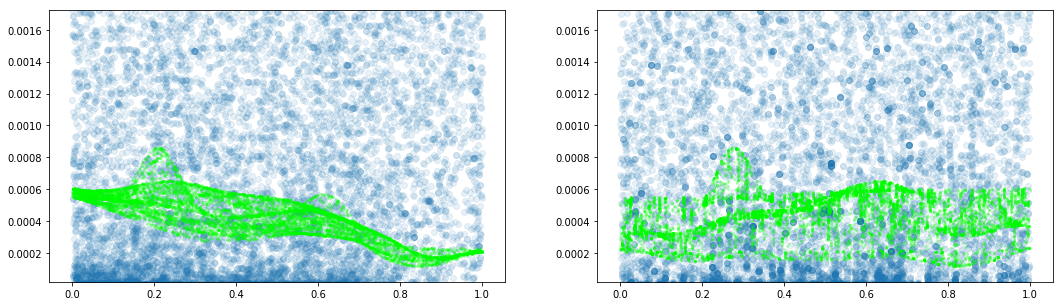

In [41]:
## GTEx-2D
PrimFDR_v2(p,x[:,0:2],5,alpha=0.1,n_itr=1000,h=None,verbose=True)

## ML initialization starts ##
## Learned parameters for null population ##
Slope: w=0.877862078899, a=[ 0.83999512 -0.03883301 -0.13649902]
Bump 0: w=0.00602597420007, mu=[ 0.84518342  0.85726738  0.85685429], sigma=[ 0.06772768  0.06747544  0.06502392]
Bump 1: w=0.00526382462254, mu=[ 0.38365092  0.12816076  0.15059897], sigma=[ 0.14411006  0.05613446  0.05239177]
Bump 2: w=0.00317974413801, mu=[ 0.25468325  0.62434109  0.54047174], sigma=[ 0.07090088  0.13096001  0.13960104]
Bump 3: w=0.00141726424166, mu=[ 0.37189647  0.4159271   0.67423341], sigma=[ 0.05601739  0.12702873  0.04981933]
Bump 4: w=0.00628933830021, mu=[ 0.881785    0.42090709  0.18581261], sigma=[ 0.04278082  0.14359934  0.07283389]
Bump 5: w=0.00182867625572, mu=[ 0.10600786  0.25012837  0.20384606], sigma=[ 0.0523858   0.11102209  0.05009151]
Bump 6: w=0.00710793817759, mu=[ 0.32167871  0.82899025  0.24797056], sigma=[ 0.12487589  0.0768302   0.08386373]
Bump 7: w=0.0100646740802, mu=[ 0.83243926  0.84157923  0.208

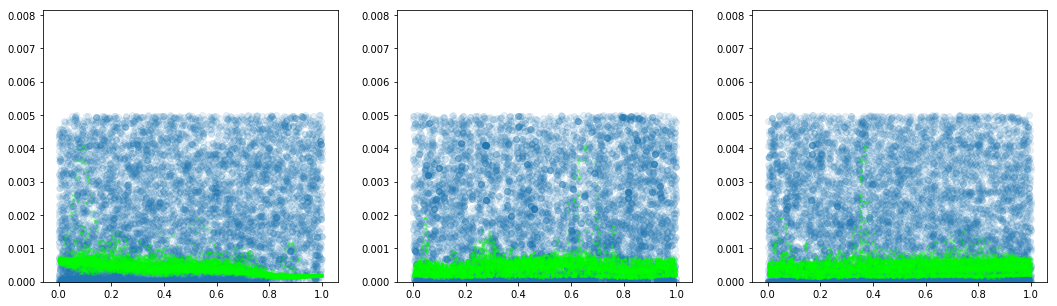

In [42]:
## GTEx-3D
PrimFDR_v2(p,x,20,alpha=0.1,n_itr=1000,h=None,verbose=True)

### Results on ML_init: 
weight $x_{alt}$ by $1 / (\hat{\pi}_0(x)+1e-5)$. Use this to creat an estimated alternative distribution

### Baseline: 
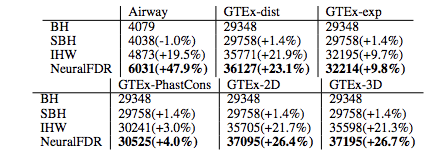

## ML initialization starts ##
!!! the model does not converge !!!


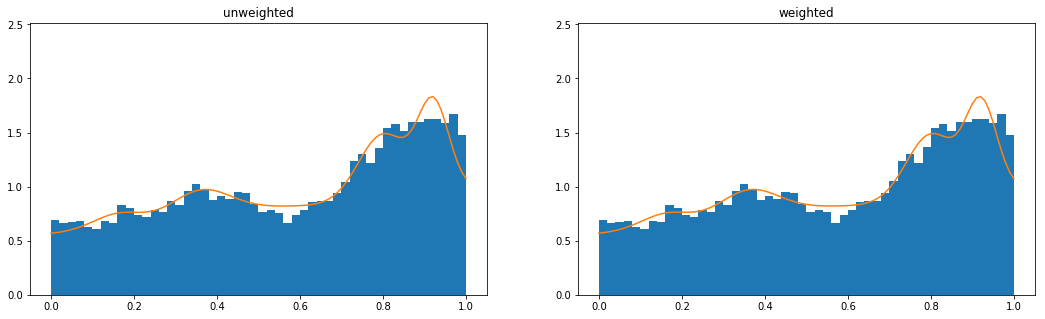

## Learned parameters for null population ##
Slope: w=0.751945446564, a=0.5470556640625
Bump 0: w=0.0766211285826, mu=[ 0.92154646], sigma=[ 0.03778617]
Bump 1: w=0.0424694594035, mu=[ 0.35889186], sigma=[ 0.07103549]
Bump 2: w=0.0893110635322, mu=[ 0.79952179], sigma=[ 0.058678]
Bump 3: w=0.0193663549862, mu=[ 0.16158897], sigma=[ 0.05951849]
Bump 4: w=0.0202865469312, mu=[ 0.46951059], sigma=[ 0.13164672]




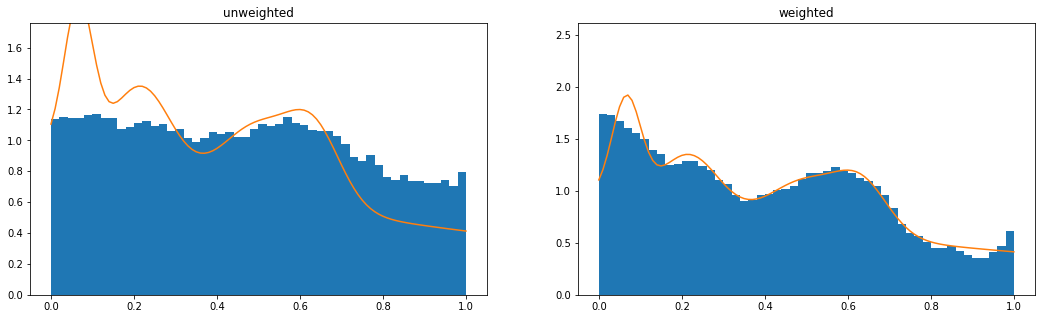

## Learned parameters ##
Slope: w=0.639478919339, a=-0.8201611328125
Bump 0: w=0.0725043978248, mu=[ 0.63562388], sigma=[ 0.06369588]
Bump 1: w=0.101484191316, mu=[ 0.21958022], sigma=[ 0.0718782]
Bump 2: w=0.0834882377864, mu=[ 0.06650707], sigma=[ 0.03509878]
Bump 3: w=0.00113006421307, mu=[ 0.73972818], sigma=[ 0.05940318]
Bump 4: w=0.101914189521, mu=[ 0.49828135], sigma=[ 0.08873695]


## Testing Summary ##
Num of discovery: 34318




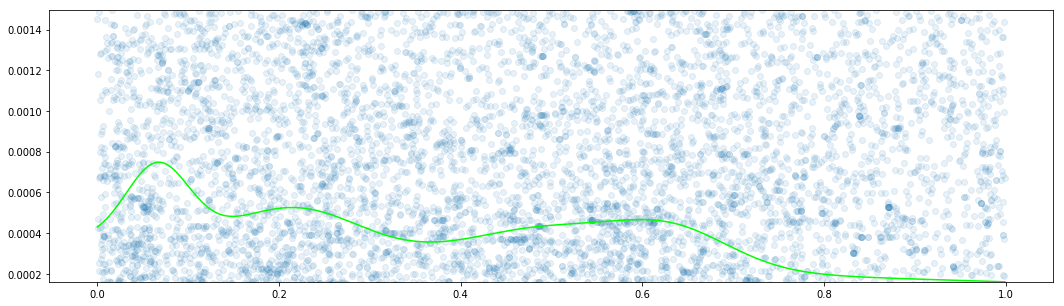

In [43]:
## feature 1
w,a,mu,sigma = ML_init(p,x[:,0],5,alpha=0.1,n_itr=100,h=None,verbose=True)

## ML initialization starts ##
!!! the model does not converge !!!


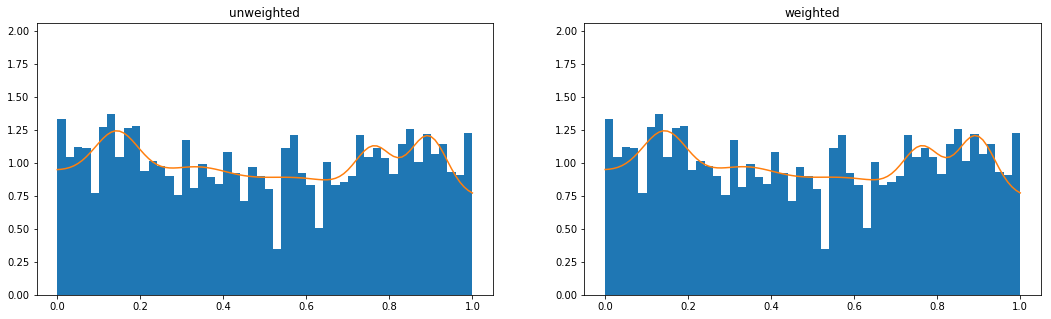

## Learned parameters for null population ##
Slope: w=0.838852304424, a=-0.23416503906250002
Bump 0: w=0.0486623748973, mu=[ 0.8940042], sigma=[ 0.04475758]
Bump 1: w=0.0155091633376, mu=[ 0.58228294], sigma=[ 0.0950542]
Bump 2: w=0.0430378591791, mu=[ 0.14416331], sigma=[ 0.05214598]
Bump 3: w=0.0364135421399, mu=[ 0.76394042], sigma=[ 0.04457147]
Bump 4: w=0.0175247560216, mu=[ 0.34150818], sigma=[ 0.07175085]


!!! the model does not converge !!!


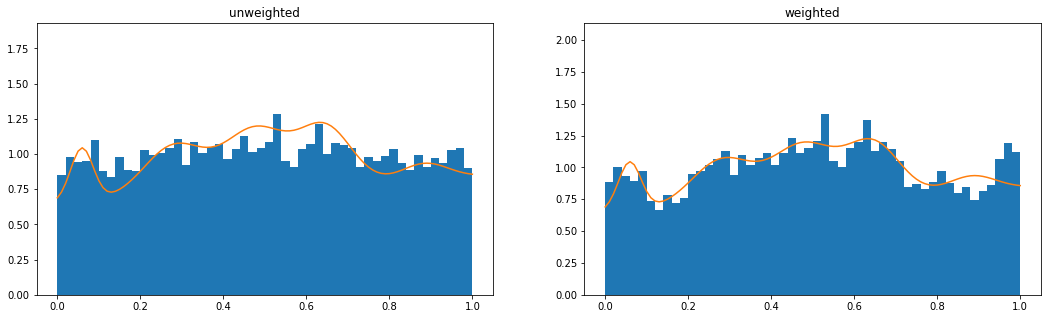

## Learned parameters ##
Slope: w=0.743076258454, a=0.2541162109375
Bump 0: w=0.066264297512, mu=[ 0.64563693], sigma=[ 0.06409253]
Bump 1: w=0.0647953075073, mu=[ 0.28109123], sigma=[ 0.07273622]
Bump 2: w=0.0839137566175, mu=[ 0.47710324], sigma=[ 0.07625431]
Bump 3: w=0.0163566156386, mu=[ 0.88496174], sigma=[ 0.05691968]
Bump 4: w=0.0255937642701, mu=[ 0.05927694], sigma=[ 0.02739402]


## Testing Summary ##
Num of discovery: 31601




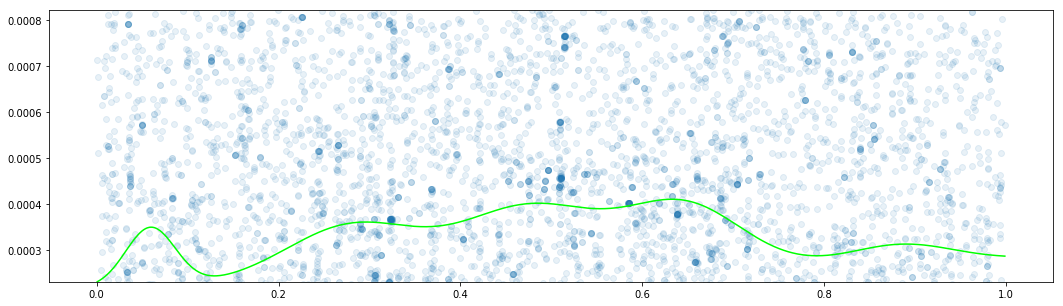

In [44]:
## feature 2
w,a,mu,sigma = ML_init(p,x[:,1],5,alpha=0.1,n_itr=100,h=None,verbose=True)

## ML initialization starts ##
!!! the model does not converge !!!


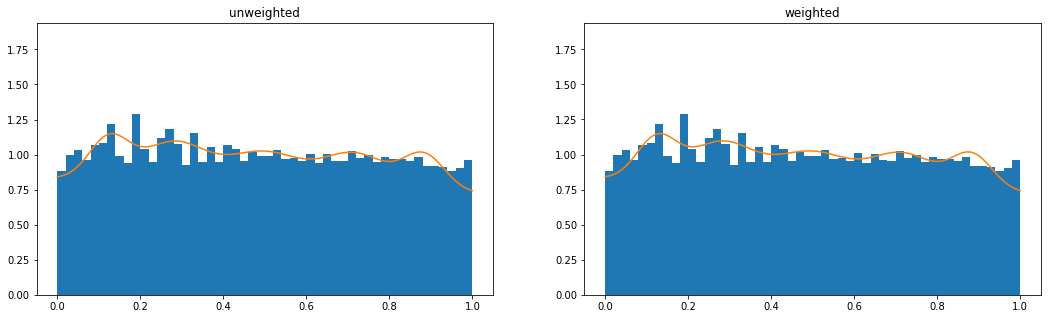

## Learned parameters for null population ##
Slope: w=0.776081670283, a=-0.1364990234375
Bump 0: w=0.0316353885847, mu=[ 0.8838988], sigma=[ 0.05012601]
Bump 1: w=0.0540679084099, mu=[ 0.28001948], sigma=[ 0.07606406]
Bump 2: w=0.0355349191827, mu=[ 0.12427864], sigma=[ 0.04818212]
Bump 3: w=0.0544849175421, mu=[ 0.49804686], sigma=[ 0.0902744]
Bump 4: w=0.0481951959971, mu=[ 0.7184374], sigma=[ 0.07728509]


!!! the model does not converge !!!


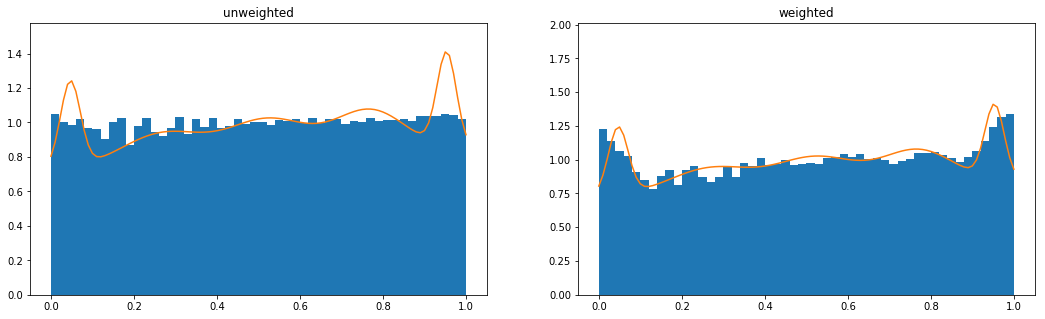

## Learned parameters ##
Slope: w=0.785308464695, a=0.1564697265625
Bump 0: w=0.0311557758913, mu=[ 0.95342285], sigma=[ 0.02328603]
Bump 1: w=0.044120799238, mu=[ 0.2692182], sigma=[ 0.09832714]
Bump 2: w=0.0564039843568, mu=[ 0.52225133], sigma=[ 0.0984099]
Bump 3: w=0.0292918288544, mu=[ 0.04685361], sigma=[ 0.02400223]
Bump 4: w=0.0537191469644, mu=[ 0.76894054], sigma=[ 0.08606718]


## Testing Summary ##
Num of discovery: 29907




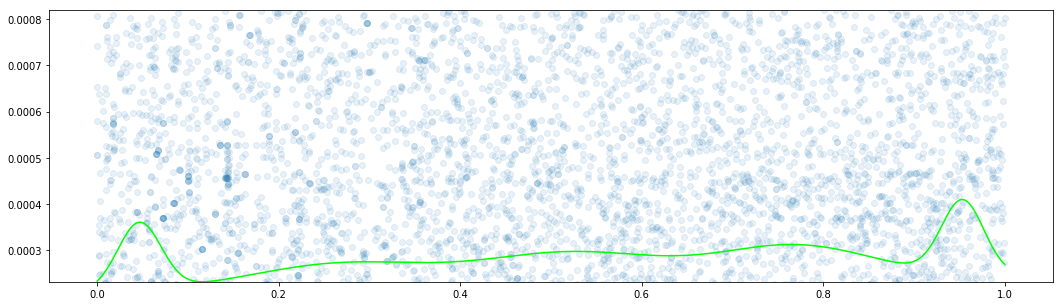

In [45]:
## feature 3
w,a,mu,sigma = ML_init(p,x[:,2],5,alpha=0.1,n_itr=100,h=None,verbose=True)

## ML initialization starts ##
## Learned parameters for null population ##
Slope: w=0.86561854294, a=[ 0.64470215 -0.13649902]
Bump 0: w=0.0436854320896, mu=[ 0.83665117  0.83000274], sigma=[ 0.07292636  0.08169188]
Bump 1: w=0.0215280039153, mu=[ 0.82874319  0.16733793], sigma=[ 0.07306852  0.06619321]
Bump 2: w=0.0199427038942, mu=[ 0.33508051  0.82856658], sigma=[ 0.11822868  0.07584975]
Bump 3: w=0.0326737442173, mu=[ 0.88316217  0.4750456 ], sigma=[ 0.05045088  0.16166703]
Bump 4: w=0.0165515729438, mu=[ 0.33804575  0.14784711], sigma=[ 0.12915256  0.05062837]


## Learned parameters ##
Slope: w=0.842491290344, a=[-1.11315918  0.15646973]
Bump 0: w=0.0140283311713, mu=[ 0.61376027  0.88013938], sigma=[ 0.05687585  0.05211097]
Bump 1: w=0.0217535373139, mu=[ 0.20436817  0.29703684], sigma=[ 0.05743463  0.06913087]
Bump 2: w=0.0308305323107, mu=[ 0.18567633  0.62146702], sigma=[ 0.08971634  0.11640745]
Bump 3: w=0.0456390415493, mu=[ 0.5842702  0.351738 ], sigma=[ 0.10700894  0.124

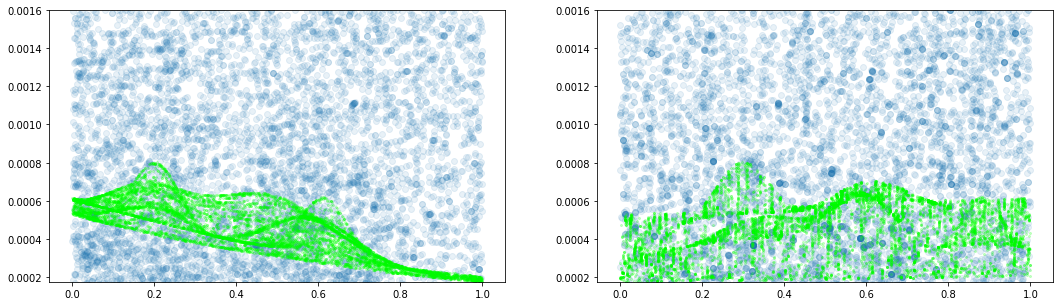

In [46]:
## 2d dist
w,a,mu,sigma = ML_init(p,x[:,0:2],5,alpha=0.1,n_itr=100,h=None,verbose=True)

## ML initialization starts ##
## Learned parameters for null population ##
Slope: w=0.926760751186, a=[ 0.74234863 -0.23416504 -0.13649902]
Bump 0: w=0.00927503000406, mu=[ 0.46996014  0.83534611  0.69647847], sigma=[ 0.20360872  0.06872709  0.11930049]
Bump 1: w=0.0178261483436, mu=[ 0.87175824  0.57919025  0.2376038 ], sigma=[ 0.04792347  0.21724393  0.10294627]
Bump 2: w=0.00497383831621, mu=[ 0.35434584  0.25702555  0.44427026], sigma=[ 0.07610881  0.11366283  0.16394248]
Bump 3: w=0.0165441066815, mu=[ 0.53414509  0.85276714  0.31060296], sigma=[ 0.21886399  0.06745702  0.11518269]
Bump 4: w=0.0246201254689, mu=[ 0.86400084  0.59798059  0.67340704], sigma=[ 0.05595723  0.20422391  0.14536503]


## Learned parameters ##
Slope: w=0.924514818051, a=[-1.11315918  0.15646973  0.15646973]
Bump 0: w=0.0172228152197, mu=[ 0.38140534  0.5830398   0.7318143 ], sigma=[ 0.14575437  0.07389056  0.12279433]
Bump 1: w=0.0199078489783, mu=[ 0.31257058  0.63779583  0.37739146], sigma=[ 0.14040054

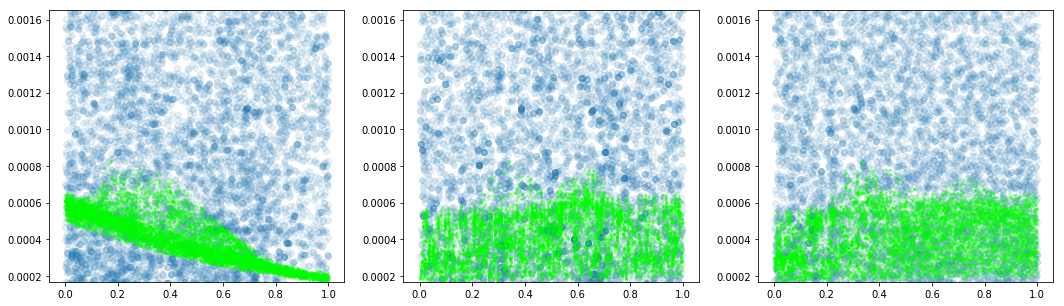

In [47]:
## 3d dist
w,a,mu,sigma = ML_init(p,x,5,alpha=0.1,n_itr=100,h=None,verbose=True)

### Parameters
n_itr=10000, n_samp=169301, lambda0=10000.1600026, lambda1=200.0
## ML initialization starts ##
## Learned parameters for null population ##
Slope: w=0.86561854294, a=[ 0.64470215 -0.13649902]
Bump 0: w=0.0436854320896, mu=[ 0.83665117  0.83000274], sigma=[ 0.07292636  0.08169188]
Bump 1: w=0.0215280039153, mu=[ 0.82874319  0.16733793], sigma=[ 0.07306852  0.06619321]
Bump 2: w=0.0199427038942, mu=[ 0.33508051  0.82856658], sigma=[ 0.11822868  0.07584975]
Bump 3: w=0.0326737442173, mu=[ 0.88316217  0.4750456 ], sigma=[ 0.05045088  0.16166703]
Bump 4: w=0.0165515729438, mu=[ 0.33804575  0.14784711], sigma=[ 0.12915256  0.05062837]


## Learned parameters ##
Slope: w=0.842491290344, a=[-1.11315918  0.15646973]
Bump 0: w=0.0140283311713, mu=[ 0.61376027  0.88013938], sigma=[ 0.05687585  0.05211097]
Bump 1: w=0.0217535373139, mu=[ 0.20436817  0.29703684], sigma=[ 0.05743463  0.06913087]
Bump 2: w=0.0308305323107, mu=[ 0.18567633  0.62146702], sigma=[ 0.08971634  0.11640745]


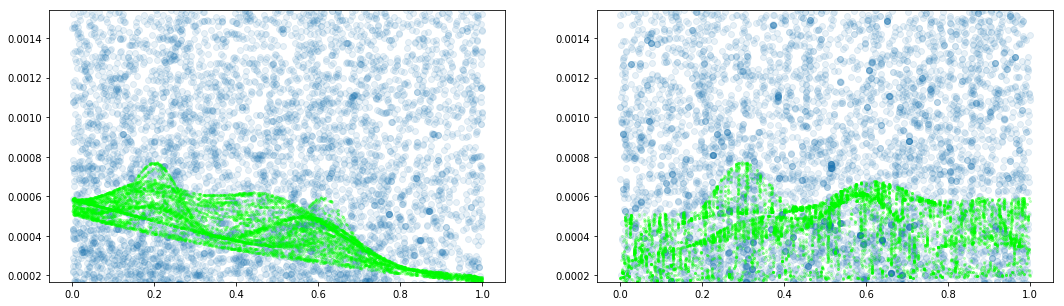

## Summary before optimization ##
## # of discovery: 34624
### initialization value ###
Slope: a=[-1.11315918  0.15646973], b=[-7.58414125]
Bump 0: w=-8.12226, mu=[ 0.61376029  0.88013941], sigma=[ 0.00646972  0.00543111]
Bump 1: w=-7.97596, mu=[ 0.20436817  0.29703686], sigma=[ 0.00659747  0.00955815]
Bump 2: w=-8.59433, mu=[ 0.18567634  0.62146699], sigma=[ 0.01609804  0.02710139]
Bump 3: w=-8.44898, mu=[ 0.58427018  0.35173801], sigma=[ 0.02290183  0.03121403]
Bump 4: w=-8.24413, mu=[ 0.46150437  0.58396226], sigma=[ 0.0387092   0.01205543]


### iteration 0 ###
mean t:  0.000396656
FD esti t: 4214.03433292
FD esti mirror: 3461
FD esti mirror sig: 3571.0
mean discovery:  0.204511491367
loss1:  [-0.19980596]
loss2:  [ 0.22240803]
n_rej:  34624
n_rej sig:  33827.3
Estimated FDP: [ 0.12457476]
FDP: 0.0
Slope: a=[-1.11815917  0.15146974], b=[-7.58914137]
Bump 0: w=-8.12726, mu=[ 0.6087603   0.88513941], sigma=[ 0.00646972  0.00543111]
Bump 1: w=-7.98096, mu=[ 0.19936819  0.30203685], si

/home/martin/NeuralFDR2/util.py:137: RuntimeWarning: overflow encountered in exp
  plt.scatter(x[h==0,0],x[h==0,1],color='b',alpha=0.2,label='null')


### iteration 2000 ###
mean t:  0.000409395
FD esti t: 4349.36716665
FD esti mirror: 3320
FD esti mirror sig: 3403.58
mean discovery:  0.207789676375
loss1:  [-0.20343785]
loss2:  [ 0.]
n_rej:  35179
n_rej sig:  34442.2
Estimated FDP: [ 0.12628005]
FDP: 0.0
Slope: a=[-1.5843029   0.06589119], b=[-7.65677261]
Bump 0: w=-7.37443, mu=[ 0.59603    0.9075256], sigma=[ 0.00646972  0.00543111]
Bump 1: w=-6.58967, mu=[ 0.1786546   0.41952586], sigma=[ 0.00659747  0.00955815]
Bump 2: w=-7.32987, mu=[ 0.06560125  0.71155518], sigma=[ 0.01609804  0.02710139]
Bump 3: w=-7.76899, mu=[ 0.52715898  0.27176166], sigma=[ 0.02290183  0.03121403]
Bump 4: w=-7.30493, mu=[ 0.49232283  0.56606114], sigma=[ 0.0387092   0.01205543]


### iteration 4000 ###
mean t:  0.000445287
FD esti t: 4730.68435927
FD esti mirror: 3317
FD esti mirror sig: 3491.91
mean discovery:  0.213194251658
loss1:  [-0.20866497]
loss2:  [ 0.]
n_rej:  36094
n_rej sig:  35327.2
Estimated FDP: [ 0.13391058]
FDP: 0.0
Slope: a=[-1.98810136 

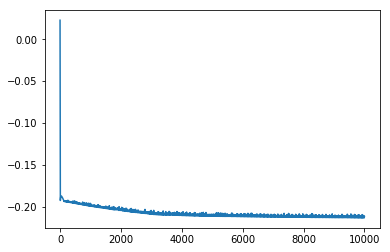

## Testing Summary ##
Num of discovery: 37952




In [112]:
## test prim_fdr
n_rej,t=PrimFDR(p,x[:,0:2],5,alpha=0.1,h=None,nr=10623893/p.shape[0],n_itr=10000,verbose=True)

### Parameters
n_itr=10000, n_samp=169301, lambda0=10000.1600026, lambda1=200.0
## ML initialization starts ##
!!! the model does not converge !!!


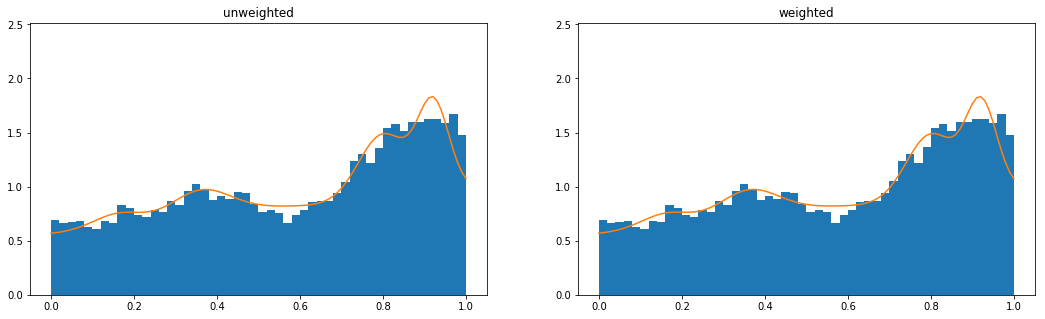

## Learned parameters for null population ##
Slope: w=0.751945446564, a=0.5470556640625
Bump 0: w=0.0766211285826, mu=[ 0.92154646], sigma=[ 0.03778617]
Bump 1: w=0.0424694594035, mu=[ 0.35889186], sigma=[ 0.07103549]
Bump 2: w=0.0893110635322, mu=[ 0.79952179], sigma=[ 0.058678]
Bump 3: w=0.0193663549862, mu=[ 0.16158897], sigma=[ 0.05951849]
Bump 4: w=0.0202865469312, mu=[ 0.46951059], sigma=[ 0.13164672]




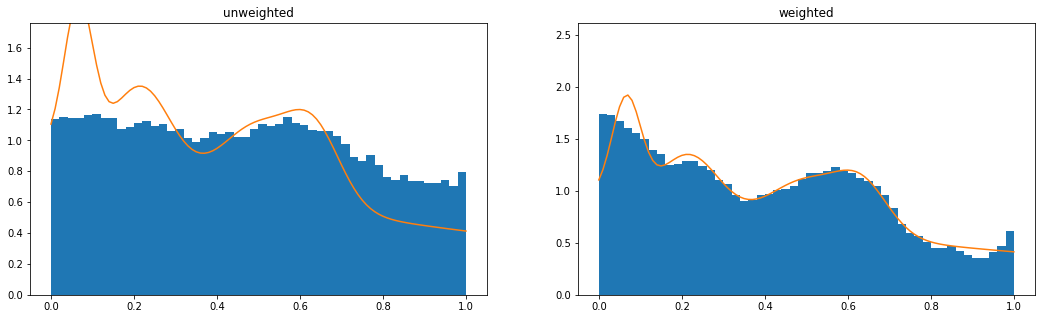

## Learned parameters ##
Slope: w=0.639478919339, a=-0.8201611328125
Bump 0: w=0.0725043978248, mu=[ 0.63562388], sigma=[ 0.06369588]
Bump 1: w=0.101484191316, mu=[ 0.21958022], sigma=[ 0.0718782]
Bump 2: w=0.0834882377864, mu=[ 0.06650707], sigma=[ 0.03509878]
Bump 3: w=0.00113006421307, mu=[ 0.73972818], sigma=[ 0.05940318]
Bump 4: w=0.101914189521, mu=[ 0.49828135], sigma=[ 0.08873695]


## Testing Summary ##
Num of discovery: 34458




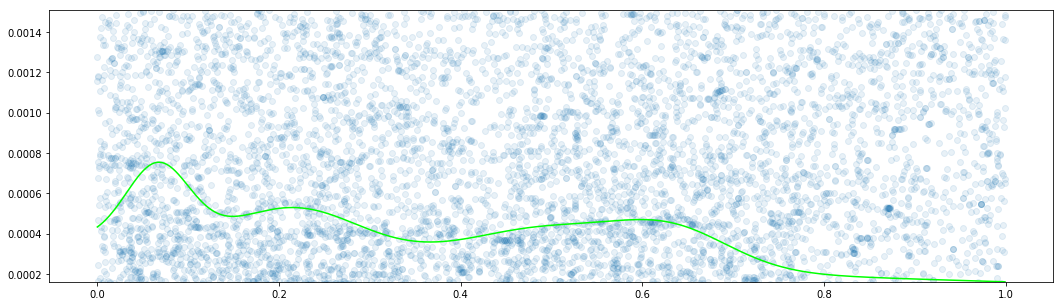

## Summary before optimization ##
## # of discovery: 34459
### initialization value ###
Slope: a=[-0.8201611], b=[-7.90595675]
Bump 0: w=-8.63047, mu=[ 0.63562387], sigma=[ 0.00811433]
Bump 1: w=-8.41507, mu=[ 0.21958022], sigma=[ 0.01033295]
Bump 2: w=-7.89346, mu=[ 0.06650707], sigma=[ 0.00246385]
Bump 3: w=-12.7221, mu=[ 0.73972815], sigma=[ 0.00705748]
Bump 4: w=-8.62155, mu=[ 0.49828136], sigma=[ 0.01574849]


### iteration 0 ###
mean t:  0.000392251
FD esti t: 4167.23497549
FD esti mirror: 3445
FD esti mirror sig: 3540.58
mean discovery:  0.203536895825
loss1:  [-0.1990829]
loss2:  [ 0.20092875]
n_rej:  34459
n_rej sig:  33704.9
Estimated FDP: [ 0.12363872]
FDP: 0.0
Slope: a=[-0.8251611], b=[-7.91095686]
Bump 0: w=-8.63547, mu=[ 0.63062388], sigma=[ 0.00811433]
Bump 1: w=-8.42007, mu=[ 0.21458022], sigma=[ 0.01033295]
Bump 2: w=-7.89846, mu=[ 0.06150708], sigma=[ 0.00246385]
Bump 3: w=-12.7271, mu=[ 0.73472822], sigma=[ 0.00705748]
Bump 4: w=-8.62655, mu=[ 0.49328136], sigma=[ 0.

/home/martin/NeuralFDR2/util.py:137: RuntimeWarning: overflow encountered in exp
  plt.scatter(x[h==0,0],x[h==0,1],color='b',alpha=0.2,label='null')


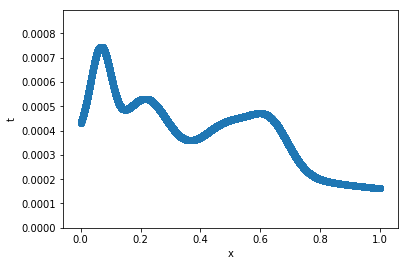



### iteration 2000 ###
mean t:  0.00038923
FD esti t: 4135.14300266
FD esti mirror: 3229
FD esti mirror sig: 3355.84
mean discovery:  0.203566429023
loss1:  [-0.199522]
loss2:  [ 0.]
n_rej:  34464
n_rej sig:  33779.3
Estimated FDP: [ 0.12241657]
FDP: 0.0
Slope: a=[-1.31024265], b=[-8.07149124]
Bump 0: w=-8.28658, mu=[ 0.59631151], sigma=[ 0.00811433]
Bump 1: w=-7.93069, mu=[ 0.21795294], sigma=[ 0.01033295]
Bump 2: w=-7.3575, mu=[ 0.05766762], sigma=[ 0.00246385]
Bump 3: w=-12.4273, mu=[ 0.60991544], sigma=[ 0.00705748]
Bump 4: w=-8.27415, mu=[ 0.47893143], sigma=[ 0.01574849]


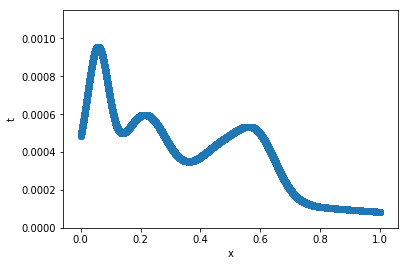



### iteration 4000 ###
mean t:  0.000399055
FD esti t: 4239.51277023
FD esti mirror: 3238
FD esti mirror sig: 3393.92
mean discovery:  0.20514940845
loss1:  [-0.20216084]
loss2:  [ 0.]
n_rej:  34732
n_rej sig:  34226.0
Estimated FDP: [ 0.12386807]
FDP: 0.0
Slope: a=[-1.69945896], b=[-8.20911217]
Bump 0: w=-8.06801, mu=[ 0.60084951], sigma=[ 0.00811433]
Bump 1: w=-7.68627, mu=[ 0.21398762], sigma=[ 0.01033295]
Bump 2: w=-7.19249, mu=[ 0.05461242], sigma=[ 0.00246385]
Bump 3: w=-12.204, mu=[ 0.62148213], sigma=[ 0.00705748]
Bump 4: w=-8.02782, mu=[ 0.46892709], sigma=[ 0.01574849]


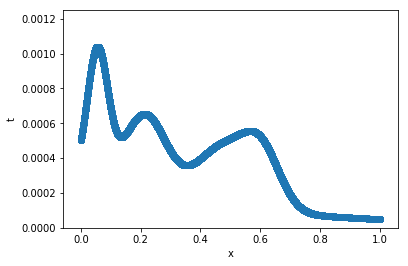



### iteration 6000 ###
mean t:  0.00040898
FD esti t: 4344.96404763
FD esti mirror: 3270
FD esti mirror sig: 3458.9
mean discovery:  0.207281705365
loss1:  [-0.20461631]
loss2:  [ 0.]
n_rej:  35093
n_rej sig:  34641.7
Estimated FDP: [ 0.12542565]
FDP: 0.0
Slope: a=[-2.03353715], b=[-8.32288837]
Bump 0: w=-7.95722, mu=[ 0.61410815], sigma=[ 0.00811433]
Bump 1: w=-7.55019, mu=[ 0.22190291], sigma=[ 0.01033295]
Bump 2: w=-7.09865, mu=[ 0.06411204], sigma=[ 0.00246385]
Bump 3: w=-12.0903, mu=[ 0.64285368], sigma=[ 0.00705748]
Bump 4: w=-7.88181, mu=[ 0.47484389], sigma=[ 0.01574849]


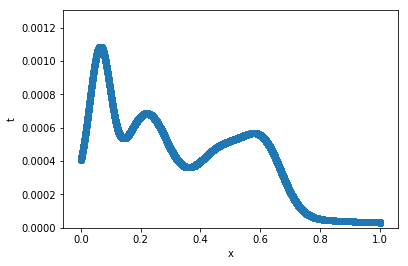



### iteration 8000 ###
mean t:  0.000406613
FD esti t: 4319.81738823
FD esti mirror: 3186
FD esti mirror sig: 3429.64
mean discovery:  0.206572908607
loss1:  [-0.20428154]
loss2:  [ 0.]
n_rej:  34973
n_rej sig:  34585.1
Estimated FDP: [ 0.12490412]
FDP: 0.0
Slope: a=[-2.35174561], b=[-8.43384838]
Bump 0: w=-7.91465, mu=[ 0.60918021], sigma=[ 0.00811433]
Bump 1: w=-7.47966, mu=[ 0.21315959], sigma=[ 0.01033295]
Bump 2: w=-7.0521, mu=[ 0.0555528], sigma=[ 0.00246385]
Bump 3: w=-12.0439, mu=[ 0.64194775], sigma=[ 0.00705748]
Bump 4: w=-7.80606, mu=[ 0.46581477], sigma=[ 0.01574849]


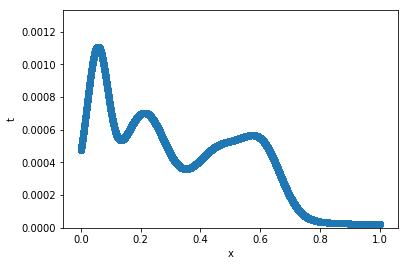

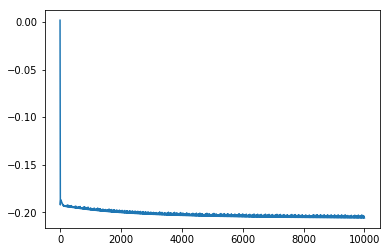

## Testing Summary ##
Num of discovery: 36789




In [110]:
## test prim_fdr
n_rej,t=PrimFDR(p,x[:,0],5,alpha=0.1,h=None,nr=10623893/p.shape[0],n_itr=10000,verbose=True)

### Parameters
n_itr=10000, n_samp=169301, lambda0=10000.1600026, lambda1=200.0
## ML initialization starts ##
## Learned parameters for null population ##
Slope: w=0.926760751186, a=[ 0.74234863 -0.23416504 -0.13649902]
Bump 0: w=0.00927503000406, mu=[ 0.46996014  0.83534611  0.69647847], sigma=[ 0.20360872  0.06872709  0.11930049]
Bump 1: w=0.0178261483436, mu=[ 0.87175824  0.57919025  0.2376038 ], sigma=[ 0.04792347  0.21724393  0.10294627]
Bump 2: w=0.00497383831621, mu=[ 0.35434584  0.25702555  0.44427026], sigma=[ 0.07610881  0.11366283  0.16394248]
Bump 3: w=0.0165441066815, mu=[ 0.53414509  0.85276714  0.31060296], sigma=[ 0.21886399  0.06745702  0.11518269]
Bump 4: w=0.0246201254689, mu=[ 0.86400084  0.59798059  0.67340704], sigma=[ 0.05595723  0.20422391  0.14536503]


## Learned parameters ##
Slope: w=0.924514818051, a=[-1.11315918  0.15646973  0.15646973]
Bump 0: w=0.0172228152197, mu=[ 0.38140534  0.5830398   0.7318143 ], sigma=[ 0.14575437  0.07389056  0.12279433]
Bump 1:

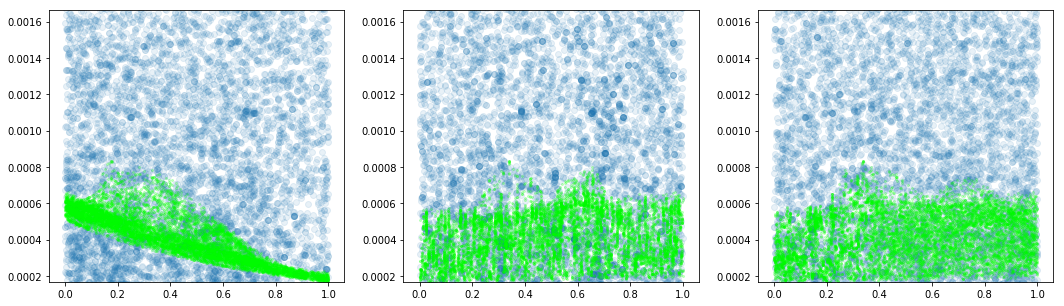

## Summary before optimization ##
## # of discovery: 33729
### initialization value ###
Slope: a=[-1.11315918  0.15646973  0.15646973], b=[-7.61363411]
Bump 0: w=-8.0722, mu=[ 0.38140535  0.58303982  0.73181432], sigma=[ 0.04248868  0.01091963  0.03015689]
Bump 1: w=-7.84226, mu=[ 0.31257057  0.63779581  0.37739146], sigma=[ 0.03942462  0.00860027  0.03480989]
Bump 2: w=-8.68244, mu=[ 0.58965111  0.42845729  0.46587512], sigma=[ 0.01393348  0.03746306  0.06640829]
Bump 3: w=-8.62256, mu=[ 0.48824856  0.36037108  0.80993479], sigma=[ 0.06197006  0.03007265  0.01500814]
Bump 4: w=-7.83987, mu=[ 0.18401465  0.3407557   0.31507787], sigma=[ 0.00716864  0.02178183  0.01743615]


### iteration 0 ###
mean t:  0.000379611
FD esti t: 4032.94822364
FD esti mirror: 3372
FD esti mirror sig: 3455.43
mean discovery:  0.199225048877
loss1:  [-0.19518346]
loss2:  [ 0.17832294]
n_rej:  33729
n_rej sig:  33044.8
Estimated FDP: [ 0.12204503]
FDP: 0.0
Slope: a=[-1.11815917  0.15146974  0.15146974], b=[-7.

/home/martin/NeuralFDR2/util.py:137: RuntimeWarning: overflow encountered in exp
  plt.scatter(x[h==0,0],x[h==0,1],color='b',alpha=0.2,label='null')


### iteration 2000 ###
mean t:  0.000385712
FD esti t: 4097.76316971
FD esti mirror: 3203
FD esti mirror sig: 3295.97
mean discovery:  0.201304186036
loss1:  [-0.19690511]
loss2:  [ 0.]
n_rej:  34081
n_rej sig:  33336.2
Estimated FDP: [ 0.12292222]
FDP: 0.0
Slope: a=[-1.54832673  0.17016624  0.16639385], b=[-7.60789442]
Bump 0: w=-6.85298, mu=[ 0.50140667  0.54334617  0.82124186], sigma=[ 0.04248868  0.01091963  0.03015689]
Bump 1: w=-7.25713, mu=[ 0.412983    0.64110065  0.45892397], sigma=[ 0.03942462  0.00860027  0.03480989]
Bump 2: w=-7.26275, mu=[ 0.54089767  0.30420476  0.64084542], sigma=[ 0.01393348  0.03746306  0.06640829]
Bump 3: w=-7.4697, mu=[ 0.16059922  0.41963452  0.88623708], sigma=[ 0.06197006  0.03007265  0.01500814]
Bump 4: w=-6.63162, mu=[ 0.170736    0.38567162  0.70409256], sigma=[ 0.00716864  0.02178183  0.01743615]


### iteration 4000 ###
mean t:  0.000402552
FD esti t: 4276.67381169
FD esti mirror: 3248
FD esti mirror sig: 3361.41
mean discovery:  0.2038735742

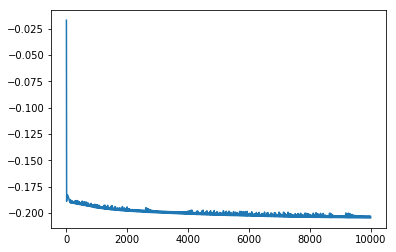

## Testing Summary ##
Num of discovery: 36560




In [111]:
## test prim_fdr
n_rej,t=PrimFDR(p,x,5,alpha=0.1,h=None,nr=10623893/p.shape[0],n_itr=10000,verbose=True)